# Sistemas Inteligentes

## Laboratório 2 - Classificação

Neste laboratório serão introduzidos: **Linear Discriminant Analysis (LDA)**, **Support Vector Machine (SVM)** e **Artificial Neural Networks (ANN)**.

### Identificação do Aluno

#### Nome Completo

    Lucas Eduardo De Mieri

#### RA

11201723007

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **dataset**.

Tendo feito o processo adequadamente, a variável dataset conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável X apenas o objeto images de dataset. Analogamente, atribua à variável y o objeto target.

Ainda nesta célula, utilize a função reshape do próprio X para forçar um formato unidimensional para cada imagem dentro do array X, que, originalmente, contém várias imagens com seus pixels distribuidos bidimensionalmente.

In [20]:
from sklearn.datasets import load_digits
import numpy as np
datasets=load_digits()
x=datasets.images
x=np.reshape(x, (len(x), 64))
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

#### Divisão dos dados em grupos para treinamento e teste.

Importe e utilize a função **train_test_split** (do pacote **model_selection**, que percente à biblioteca **sklearn**) para dividir os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **X_train**, **X_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split**.

In [21]:
from sklearn.model_selection import train_test_split

In [27]:
y=datasets.target
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25)

### Linear Discriminant Analysis (LDA)

#### Treinamento

Importe o classificador do LDA, que é uma função chamada **LinearDiscriminantAnalysis** do pacote **discriminant_analysis**, que faz parte da biblioteca **sklearn**. Então crie o classificador com o nome **LDA** atribundo a ele a função **LinearDiscriminantAnalysis**.

Treine o classificador **LDA** por meio de sua própria função **fit()**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **X_train** e **y_train**.

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [32]:
LDA=LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

#### Classificação e Resultados

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **LDA**. O argumento da função é apenas a entrada de teste, ou seja, **X_test**. Atribua a saída dessa classificação à variável **y_pred_LDA**.

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**, então imprima a acurácia do classificador lda e sua confusion matrix.

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
y_pred_LDA=LDA.predict(x_test)
confusion_matrix(y_test, y_pred_LDA)


array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 48,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 48,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 39]], dtype=int64)

In [41]:
accuracy_score(y_test, y_pred_LDA)

0.9711111111111111

### Support Vector Machine (SVM)

#### Treinamento

Importe a função **LinearSVC**, pertencente ao pacote **svm** da biblioteca **sklearn**, então crie o classificador chamado **SVM**, análogo ao que foi feito com o LDA anteriormente.

Então, treine o classificador **SVM** utilizando a função **fit** com os dados de treinamento, **X_train** e **y_train**, respectivamente.

In [43]:
from sklearn.svm import LinearSVC

In [45]:
SVM=LinearSVC()
SVM.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### Classificação e Resultados

Faça a classificação dos dados de entrada para testes, **X_test**, utilizando a função **predict** do próprio **SVM** e armazene os resultados em **y_pred_SVM**.

Na mesma célula, verifique a acurácia do classificador **SVM** por meio da função **accuracy_score** e mostre a matriz de confusão do classificador **SVM** utilizando a função **confusion_matrix**.

In [46]:
y_pred_SVM=SVM.predict(x_test)
accuracy_score(y_test, y_pred_SVM)

0.96

In [47]:
confusion_matrix(y_test, y_pred_SVM)

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  1,  0,  0,  1,  1],
       [ 0,  1, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  1,  0, 35,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 45,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 42,  0,  2],
       [ 0,  2,  0,  0,  0,  0,  1,  0, 49,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  1, 36]], dtype=int64)

### Artificial Neural Networks (ANN)

#### Treinamento

Importe a função **MLPClassifier**, pertencente ao pacote **neural_network** da biblioteca **sklearn**, então crie o classificador **ANN** usando a função importada com os parâmetros e **hidden_layer_sizes=(50)**.

Depois, treine o classificador usando os dados de entrada e saída de treinamento.

In [51]:
from sklearn.neural_network import MLPClassifier

In [55]:
ANN=MLPClassifier(hidden_layer_sizes=(50))
ANN.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

#### Classificação e Resultados

Faça a predição com base nos dados de entrada de teste com o classificador **ANN**, atribundo as predições à variável **y_pred_ANN**. Então imprima a acurácia e a matriz de confusão dessa classificação.

In [57]:
y_pred_ANN=ANN.predict(x_test)

In [59]:
accuracy_score(y_test, y_pred_ANN)

0.9888888888888889

In [60]:
confusion_matrix(y_test,y_pred_ANN)

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 45,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 43,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 51,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 39]], dtype=int64)

#### Análise para diferentes quantidades de neurônios

Faça, iterativamente, com que seja treinada e testada uma rede neural de uma camada, utilizando uma quantidade crescente de neurônios, indo de 1 a 50. Armazene o valor da acurácia para cada iteração, então imprima as seguintes estatísticas sobre a acurácia: mínima, máxima, média, mediana, moda, variância e desvio padrão.

In [69]:
accuracy=np.zeros(50)
for i in range(1, 50):
    ANN=MLPClassifier(hidden_layer_sizes=i)
    ANN.fit(x_train, y_train)
    y_pred_ANN=ANN.predict(x_test)
    accuracy[i]=accuracy_score(y_test,y_pred_ANN)

In [82]:
print("minimo", np.nanmin(accuracy))
print("maximo", np.nanmax(accuracy))
print("media",np.mean(accuracy))
print("mediana", np.median(accuracy))
print("moda", np.average(accuracy))
print("variancia", np.var(accuracy))
print("despad", np.std(accuracy))
print("hist", np.histogram(accuracy))

minimo 0.0
maximo 0.9911111111111112
media 0.9067555555555556
mediana 0.9733333333333334
moda 0.9067555555555556
variancia 0.0355069550617284
despad 0.1884328927276987
hist (array([ 1,  1,  0,  0,  0,  1,  0,  2,  4, 41], dtype=int64), array([0.        , 0.09911111, 0.19822222, 0.29733333, 0.39644444,
       0.49555556, 0.59466667, 0.69377778, 0.79288889, 0.892     ,
       0.99111111]))


Utilizando subplots, gere o gráfico da acurácia do classificador para cada quantidade de neurônios na camada da rede neural e o gráfico do erro, considerando como o erro a diferença entre as acurácias das últimas duas iterações para cada iteração.

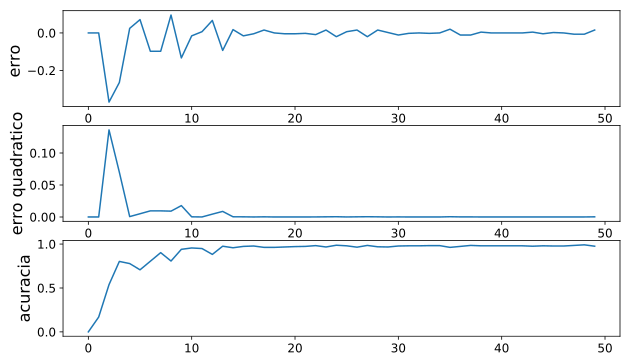

In [113]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

err=np.zeros(50)

for i in range (2,50):
    err[i]=(accuracy[i-1]-accuracy[i])
    
plt.subplot(311)
plt.plot(err)
plt.ylabel("erro ")  
         
plt.subplot(312)
plt.plot(err**2)
plt.ylabel("erro quadratico")
         
plt.subplot(313)
plt.ylabel("acuracia")
plt.plot(accuracy)

In [99]:
err

array([0.        , 0.        , 0.36888889, 0.26444444, 0.02444444,
       0.07111111, 0.09777778, 0.09777778, 0.09555556, 0.13333333,
       0.01555556, 0.00666667, 0.06666667, 0.09333333, 0.01777778,
       0.01555556, 0.00444444, 0.01555556, 0.        , 0.00444444,
       0.00444444, 0.00222222, 0.00888889, 0.01555556, 0.02      ,
       0.00666667, 0.01555556, 0.02      , 0.01555556, 0.00222222,
       0.01111111, 0.00222222, 0.        , 0.00222222, 0.        ,
       0.02      , 0.01111111, 0.01111111, 0.00444444, 0.        ,
       0.        , 0.        , 0.        , 0.00444444, 0.00444444,
       0.00222222, 0.        , 0.00666667, 0.00666667, 0.01555556])

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)